In [1]:
import os
import sys

import random

import torch
import torch.nn as nn
import torchvision.transforms as TF
import numpy as np

import matplotlib.pyplot as plt

In [2]:
HOME = os.path.abspath('../')
if HOME not in sys.path:
    sys.path.append(HOME)

In [3]:
from datasets.wafer import WM811K
from datasets.transforms import WM811KTransform

In [4]:
print(*[f"{i} : {l}" for l, i in WM811K.label2idx.items()], sep='\n')

0 : center
1 : donut
2 : edge-loc
3 : edge-ring
4 : loc
5 : random
6 : scratch
7 : near-full
8 : none
9 : -


In [5]:
SIZE = (96, 96)
DATA_FOLDER = '../data/wm811k/labeled/test/'

In [6]:
org_trans = WM811KTransform(size=SIZE, mode='test')
org_set = WM811K(root=DATA_FOLDER, transform=org_trans)

In [7]:
rot_trans = WM811KTransform(size=SIZE, mode='rotate')
rot_set = WM811K(root=DATA_FOLDER, transform=rot_trans)

In [8]:
crop_trans = WM811KTransform(size=SIZE, mode='crop')
crop_set = WM811K(root=DATA_FOLDER, transform=crop_trans)

In [9]:
cutout_trans = WM811KTransform(size=SIZE, mode='cutout')
cutout_set = WM811K(root=DATA_FOLDER, transform=cutout_trans)

In [10]:
noise_trans = WM811KTransform(size=SIZE, mode='noise')
noise_set = WM811K(root=DATA_FOLDER, transform=noise_trans)

In [11]:
shift_trans = WM811KTransform(size=SIZE, mode='shift')
shift_set = WM811K(root=DATA_FOLDER, transform=shift_trans)

In [12]:
crop_rot_trans = WM811KTransform(size=SIZE, mode='crop+rotate')
crop_rot_set = WM811K(root=DATA_FOLDER, transform=crop_rot_trans)

In [13]:
sh_crop_rot_trans = WM811KTransform(size=SIZE, mode='shift+crop+rotate')
sh_crop_rot_set = WM811K(root=DATA_FOLDER, transform=sh_crop_rot_trans)

In [14]:
scrcn_trans = WM811KTransform(size=SIZE, mode='shift+crop+rotate+cutout+noise')
scrcn_set = WM811K(root=DATA_FOLDER, transform=scrcn_trans)

In [15]:
def revert_wbm_to_numpy(x: torch.Tensor) -> np.ndarray:
    assert (x.shape[0] == 2) & (x.ndim == 3), "(2, H, W)"
    return x.sum(0).numpy()

In [16]:
def plot_comparisons(datasets: list or dict, size: int = 10, target: int = None):
    
    if isinstance(datasets, dict):
        augmentations = [aug for aug, _ in datasets.items()]
        datasets = [d for _, d in datasets.items()]
    elif isinstance(datasets, list):
        augmentations = ['' for _ in range(len(datasets))]
    else:
        raise NotImplementedError
    
    nrows = size
    ncols = len(datasets)
    indices = np.random.randint(datasets[0].__len__(), size=size)
    
    fig, axes = plt.subplots(nrows=size, ncols=len(datasets), figsize=(ncols * 4, nrows * 4))
    for i, idx in enumerate(indices):
        for j, dset in enumerate(datasets):
            x = revert_wbm_to_numpy(dset[i]['x'])
            axes[i][j].imshow(x, cmap=plt.cm.binary)
            axes[i][j].set_title(f"Index: {i} {augmentations[j]}")
    
    plt.show(fig)

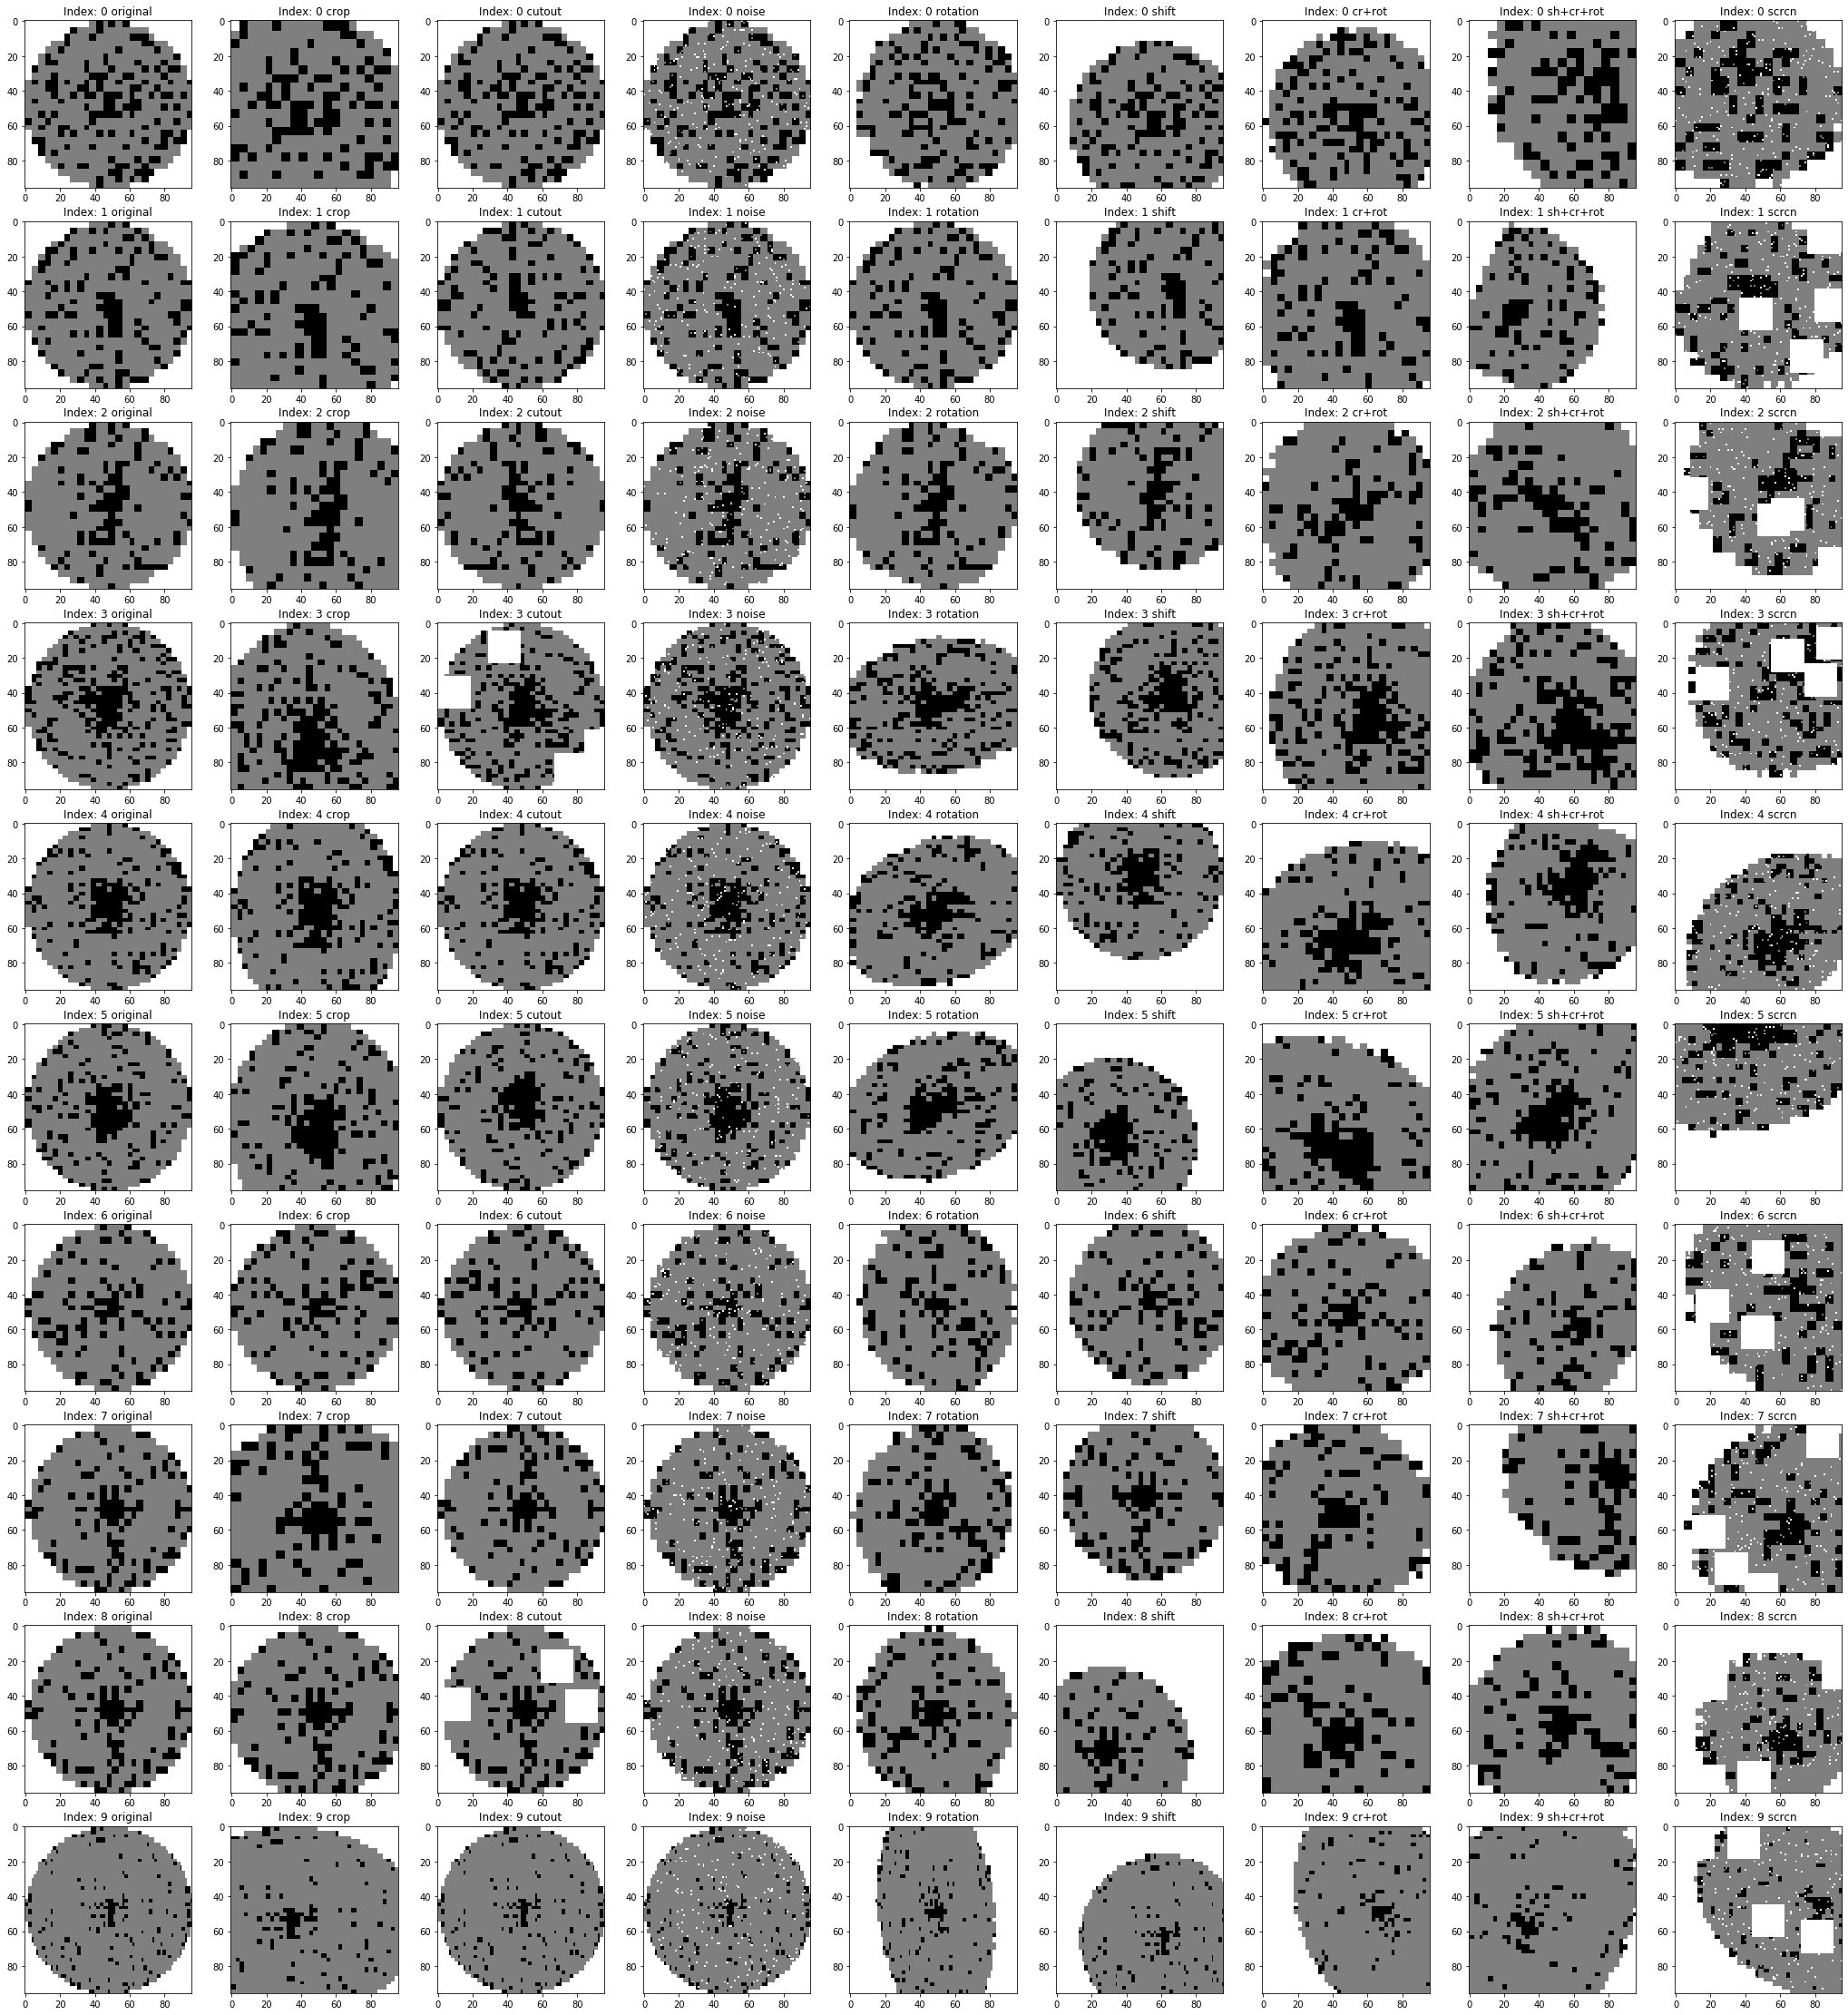

In [17]:
plot_comparisons(
    {'original': org_set,
     'crop': crop_set,
     'cutout': cutout_set,
     'noise': noise_set,
     'rotation': rot_set,
     'shift': shift_set,
     'cr+rot': crop_rot_set,
     'sh+cr+rot': sh_crop_rot_set,
     'scrcn': scrcn_set,
    },
    size=10)